In [87]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
sns.set_style("darkgrid")

In [89]:
tips = sns.load_dataset("tips")
# tips.tail()
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Relational plot

No     151
Yes     93
Name: smoker, dtype: int64

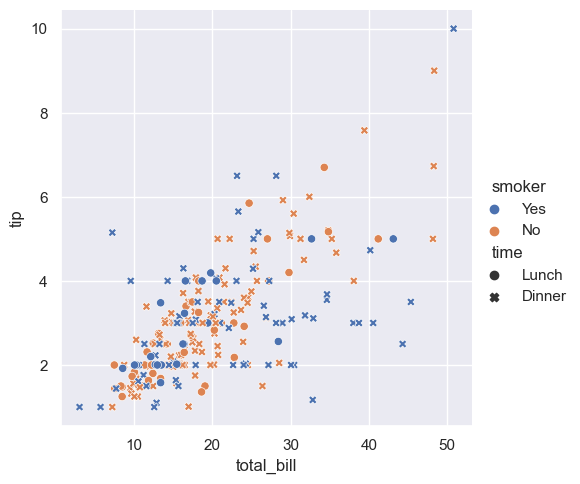

In [90]:
sns.relplot(x="total_bill", y="tip", data=tips, hue="smoker", style="time")
# dir(sns.FacetGrid)
tips['smoker'].unique()
tips['smoker'].value_counts()

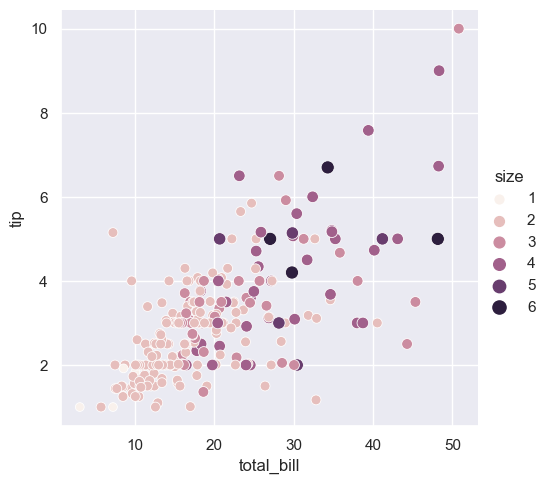

In [235]:
sns.relplot(x="total_bill", y="tip", data=tips, hue="size", size='size', sizes=(40, 90), palette="ch:l=-0.5, l=0.95");

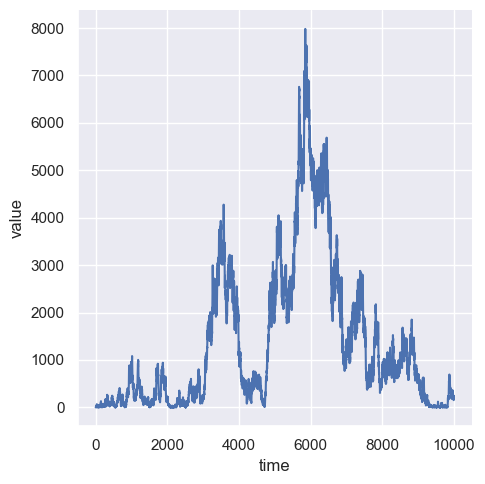

In [164]:
df = pd.DataFrame(dict(time=np.arange(10000), value=np.random.randn(10000).cumsum() **2))
sns.relplot(x='time', y='value', data=df, kind='line', sort=False)

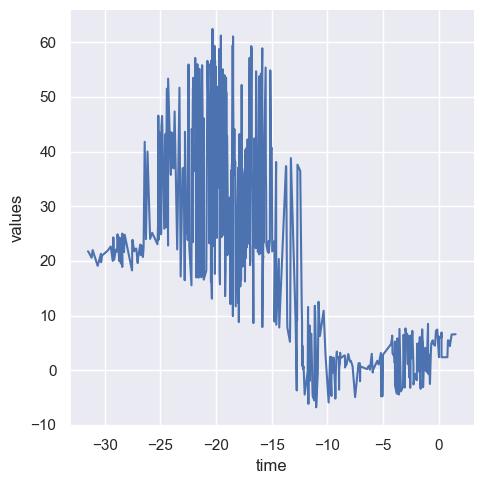

In [238]:
dfb = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["time", "values"])
sns.relplot(x='time', y='values', data=dfb, sort=True, kind='line')

In [169]:
fmri = sns.load_dataset("fmri")
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


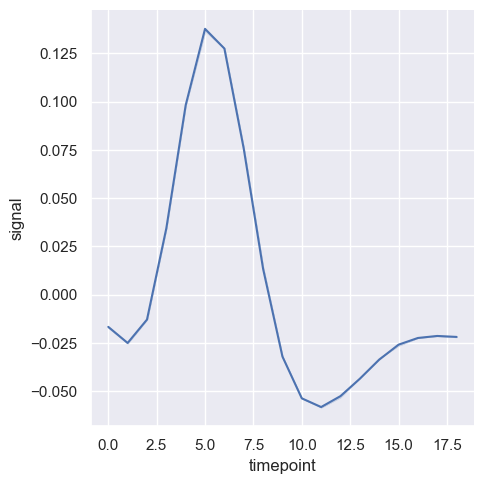

In [239]:
sns.relplot(x="timepoint", y='signal', errorbar=('ci', False), kind='line', data=fmri)
# ci is confidence interval

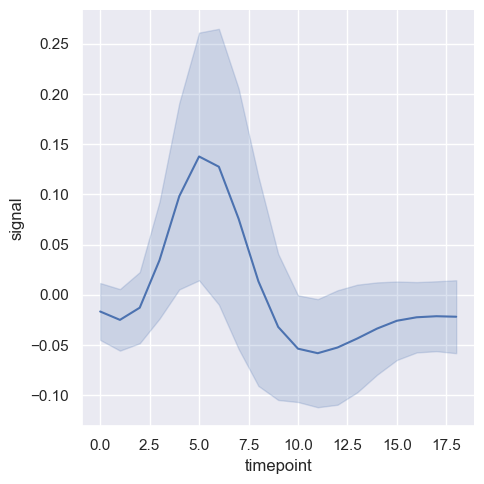

In [176]:
sns.relplot(x="timepoint", y='signal', errorbar="sd", kind='line', data=fmri)
# errorbar ci= "sd" sd is standard deviation

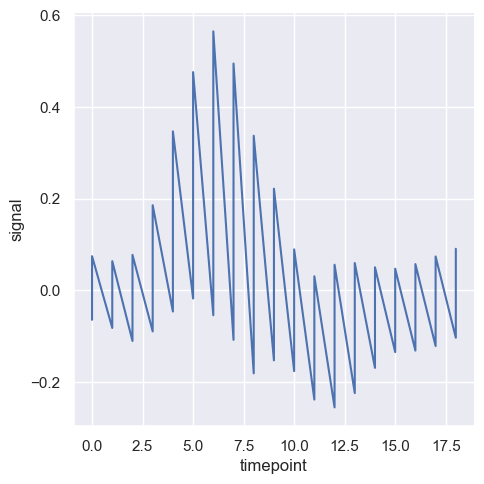

In [179]:
sns.relplot(x="timepoint", y='signal', estimator=None, kind='line', data=fmri)


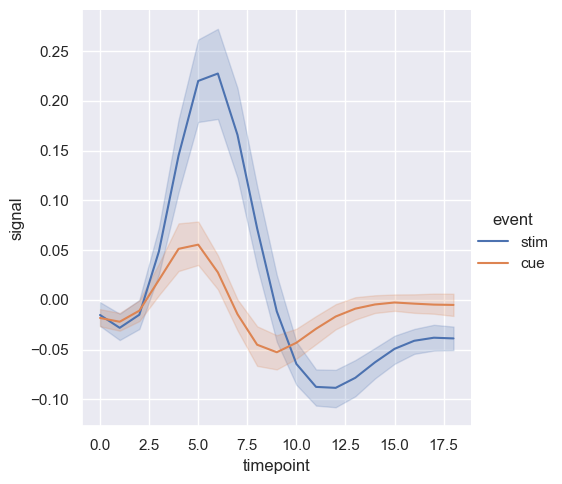

In [195]:
sns.relplot(x="timepoint", y='signal', sort=True, hue="event", kind='line', data=fmri)


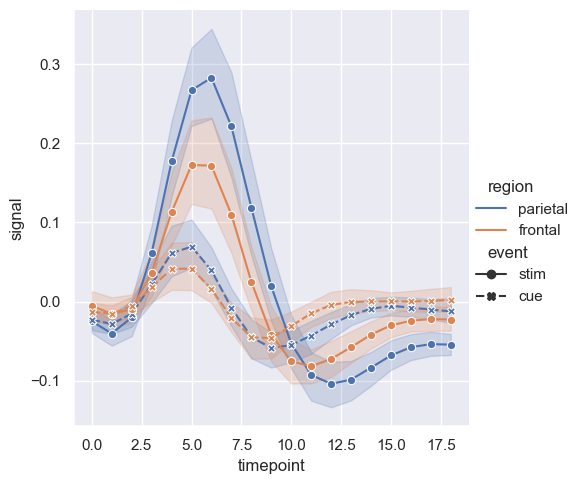

In [198]:
sns.relplot(x="timepoint", y='signal', sort=True, hue="region", kind='line', style="event", markers=True, dashes=True, data=fmri)

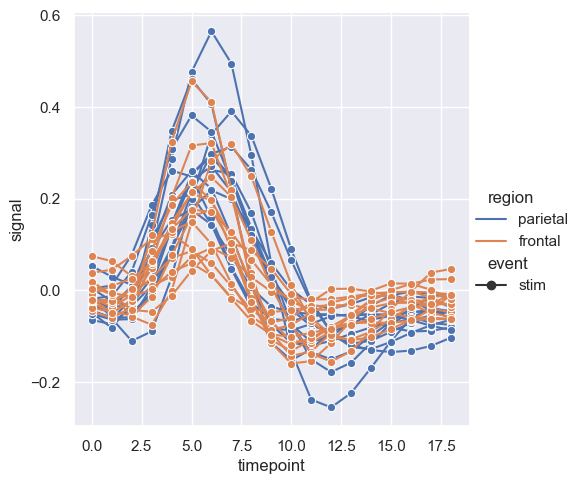

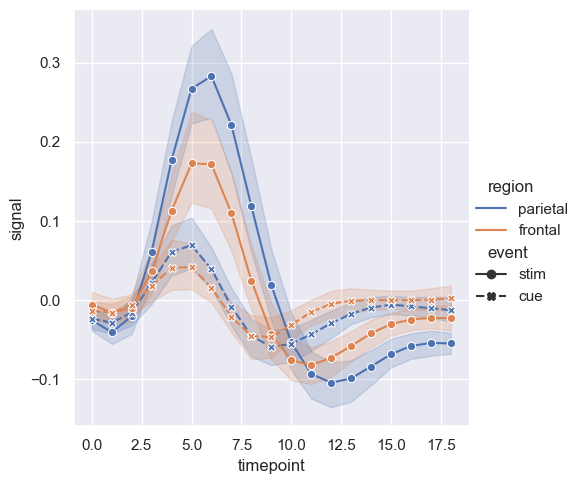

In [245]:
sns.relplot(x="timepoint", y='signal', estimator=None, hue="region", units="subject", kind='line', style="event", markers=True, dashes=True, data=fmri.query('event == "stim"'))

sns.relplot(x="timepoint", y='signal', sort=True, hue="region", kind='line', style="event", markers=True, dashes=True, data=fmri)

<Axes: xlabel='timepoint', ylabel='signal'>

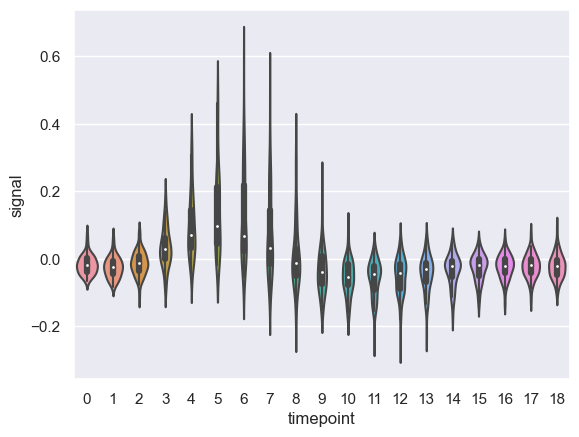

In [243]:
sns.violinplot(x="timepoint", y='signal', data=fmri)

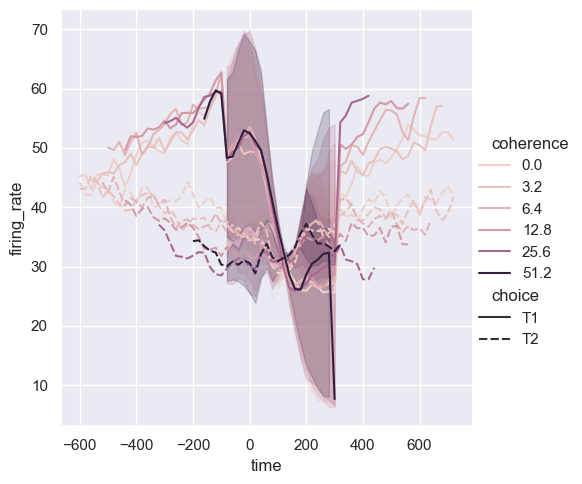

In [260]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", data=dots, hue="coherence", kind="line", sort=True, style="choice");

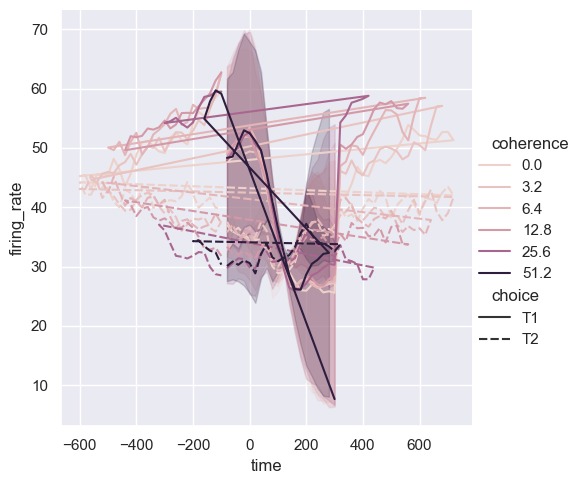

In [265]:
palette = sns.cubehelix_palette(light=0.8, n_colors=6)
sns.relplot(x="time", y="firing_rate", data=dots, hue="coherence", kind="line", sort=False, style="choice");

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_callbacks',
 '_canvas_callbacks',
 '_check_layout_engines_compat',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_dpi',
 '_fig_callbacks',
 '_fully_clipped_to_axes',
 '_gci',
 '_get_dpi',
 '_get_draw_artists',
 '_get_renderer',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_label',
 '_layout_engine',
 '_localaxes',
 '_mouse_key_ids',
 '_mouseover',
 '_norm_per_subplot_kw',
 '_normalize_grid_string',
 

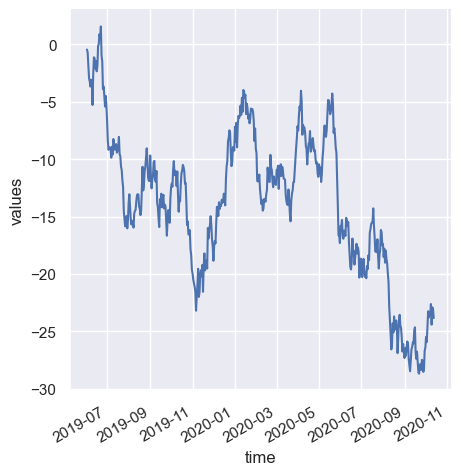

In [285]:
dfc = pd.DataFrame(dict(time = pd.date_range("2019-06-02", periods=500), values = np.random.randn(500).cumsum()))
plot = sns.relplot(x='time', y="values", data=dfc, kind='line');

plot.fig.autofmt_xdate()
dir(plot.fig)

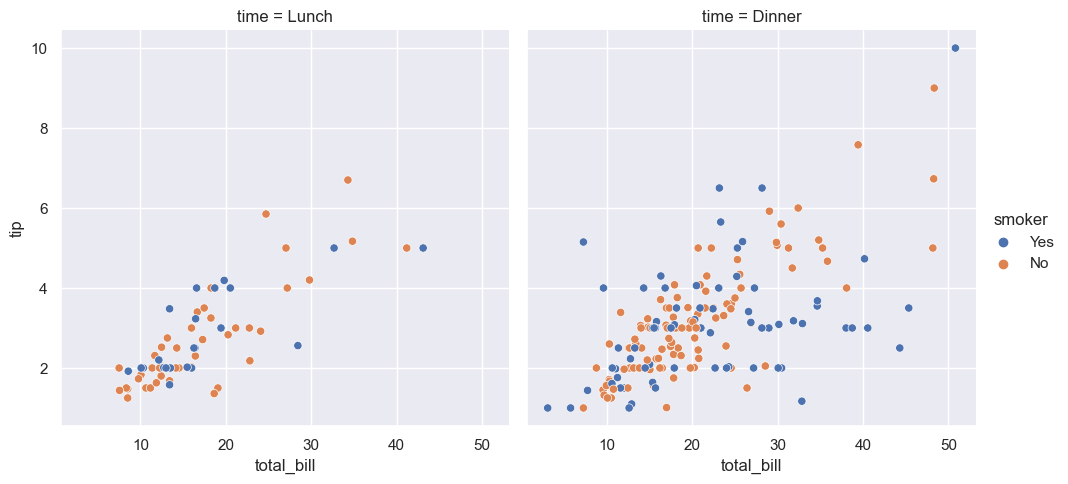

In [289]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

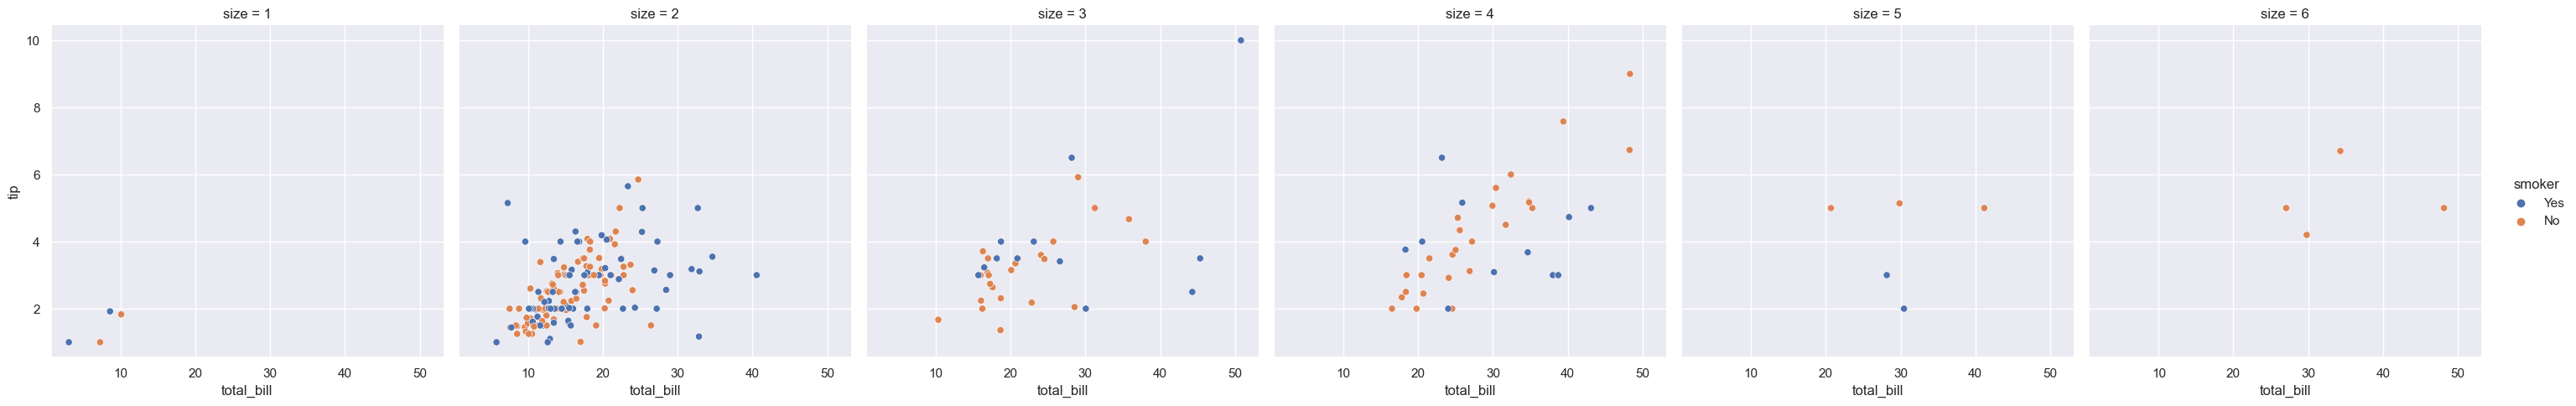

In [290]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='size', data=tips)

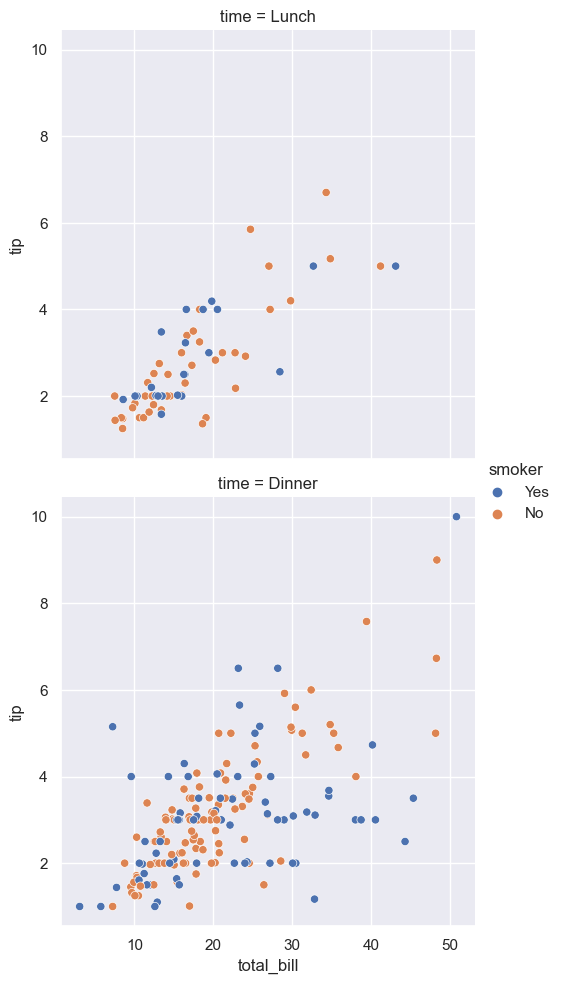

In [291]:
sns.relplot(x='total_bill', y='tip', hue='smoker', row='time', data=tips)

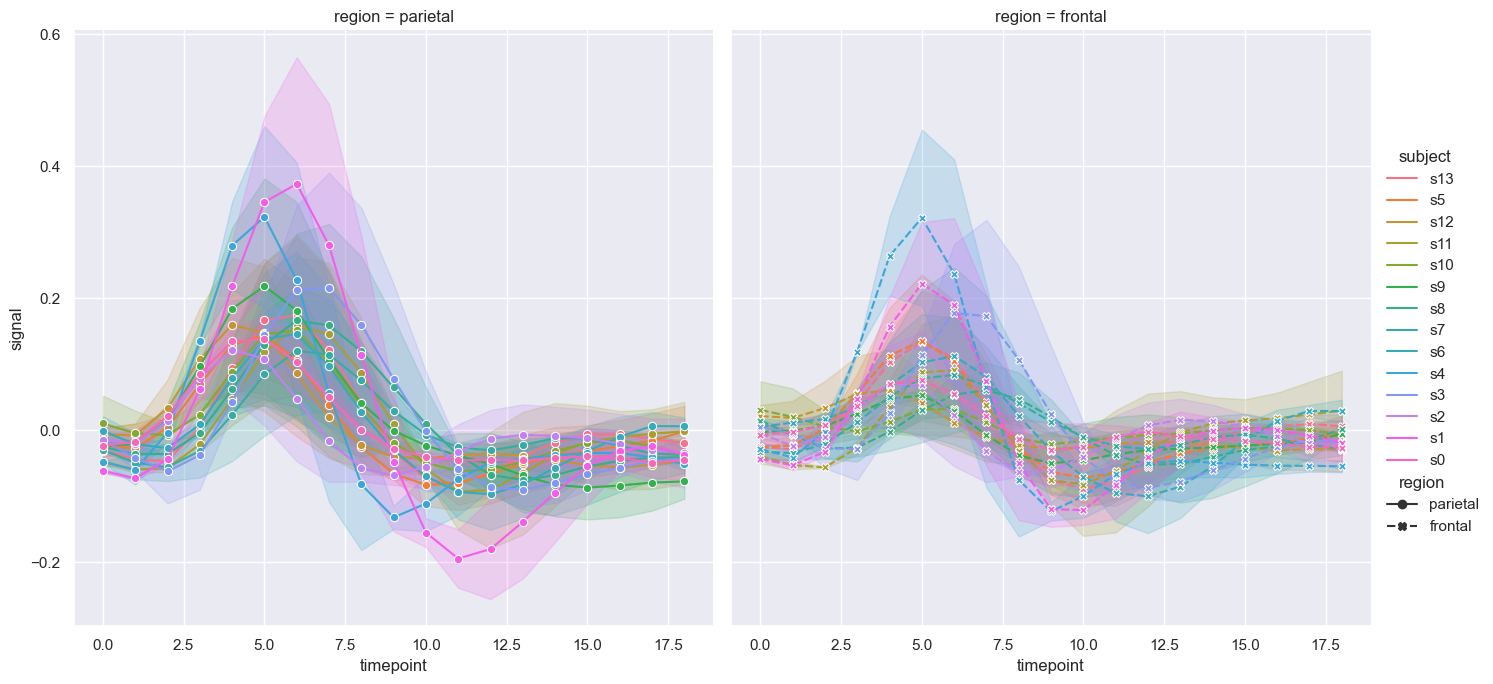

In [302]:
sns.relplot(x='timepoint', y='signal', hue='subject', style="region", col='region',height=7, markers=True, kind='line', col_wrap=2, data=fmri)

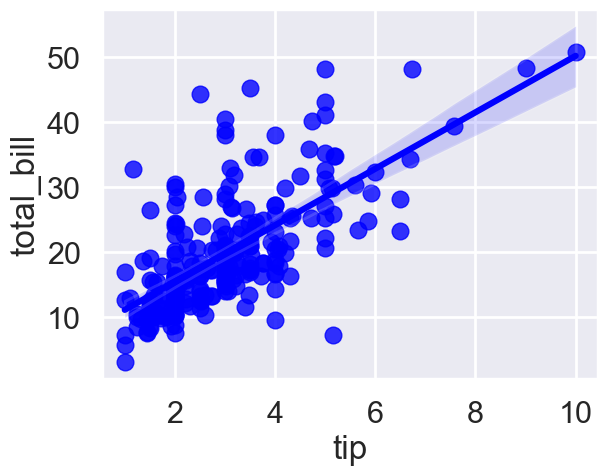

In [502]:
sns.regplot(x='tip', y='total_bill', x_estimator=None,data=tips, color="blue");
# tips

In [514]:
# Electricity data time series analysis
electricity_data = pd.read_csv("../../Desktop/Electricity Data CSV Format.csv")
electricity_data.loc[4]

Unnamed: 0                                EKO (EKEDC)
Unnamed: 1                                       192 
Unnamed: 2                                       195 
Unnamed: 3                                       155 
ENERGY BILLED/ELECTRICITY SUPPLY (GWh)           163 
                                             ...     
Unnamed: 104                                   2,768 
Unnamed: 105                                     300 
Unnamed: 106                                     262 
Unnamed: 107                                     266 
Unnamed: 108                                     828 
Name: 4, Length: 109, dtype: object